# PART 1 : Data Collection and Preprocessing

In [1]:
pip install yfinance pandas numpy scikit-learn

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 262.6 kB/s eta 0:00:12
      --------------------------------------- 0.1/3.0 MB 328.2 kB/s eta 0:00:09
     - -------------------------------------- 0.1/3.0 MB 403.5 kB/s eta 0:00:08
     - -------------------------------------- 0.1/3.0 MB 403.5 kB/s eta 0:00:08
     -- ------------------------------------- 0.2/3.0 MB 538.9 kB/s eta 0:00:06
     --- ------------------------------------ 0.2/3.0 MB 654.9 kB/s eta 0:00:05
     ----- ---------------------------------- 0.4/3.0 MB 983.6 kB/s eta 0:00:03
     ------ --------------------------------- 0.5/3.0 MB 1.2 MB/s eta 0:00:03
     ---------- ----------------------------- 0.7/3.0 MB 1.6 MB/s eta 0:00:02
     ---------- ----------------------------- 0.7/3.0 MB 1.6 MB/s eta 0

In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

In [11]:
# Downloading data for Apple Inc. (AAPL) and Reliance Industries (RELIANCE)
aapl_data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
reliance_data = yf.download('RELIANCE.NS', start='2018-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Test if data has been retrieved
print("Apple Inc. (AAPL) Data:")
print(aapl_data.head())
print("\nReliance Industries (RELIANCE) Data:")
print(reliance_data.head())

Apple Inc. (AAPL) Data:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.568924  102223600
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.561863  118071600
2018-01-04  43.134998  43.367500  43.020000  43.257500  40.750282   89738400
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.214237   94640000
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.061146   82271200

Reliance Industries (RELIANCE) Data:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-01  843.654785  843.654785  829.756958  831.814209  806.939636   
2018-01-02  834.785767  840.774658  828.751160  833.094238  808.181335   
2018-01-03  845.757751  846.672119  834.831482  836.431580  811.418945   
2018-01-04  839.494568  842.8

In [13]:
# Drop any missing values
aapl_data = aapl_data.dropna()
reliance_data = reliance_data.dropna()

In [15]:
# Selecting the 'Close' price as the relevant feature
aapl_close = aapl_data[['Close']]
reliance_close = reliance_data[['Close']]

In [17]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the data
aapl_scaled = scaler.fit_transform(aapl_close)
reliance_scaled = scaler.fit_transform(reliance_close)

In [19]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

# Define the sequence length (e.g., 60 days)
seq_length = 60

# Create sequences
aapl_x, aapl_y = create_sequences(aapl_scaled, seq_length)
reliance_x, reliance_y = create_sequences(reliance_scaled, seq_length)

In [21]:
# Test that the data is cleaned properly
print("Cleaned Apple Inc. (AAPL) Close Prices:")
print(aapl_close.head())
print("\nCleaned Reliance Industries (RELIANCE) Close Prices:")
print(reliance_close.head())

Cleaned Apple Inc. (AAPL) Close Prices:
                Close
Date                 
2018-01-02  43.064999
2018-01-03  43.057499
2018-01-04  43.257500
2018-01-05  43.750000
2018-01-08  43.587502

Cleaned Reliance Industries (RELIANCE) Close Prices:
                 Close
Date                  
2018-01-01  831.814209
2018-01-02  833.094238
2018-01-03  836.431580
2018-01-04  841.460388
2018-01-05  844.157654


In [23]:
# Split the data into training and testing sets
aapl_x_train, aapl_x_test, aapl_y_train, aapl_y_test = train_test_split(aapl_x, aapl_y, test_size=0.2, random_state=42)
reliance_x_train, reliance_x_test, reliance_y_train, reliance_y_test = train_test_split(reliance_x, reliance_y, test_size=0.2, random_state=42)

# Part 2 : Building the LSTM Model

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [28]:
# Define the LSTM model
model = Sequential()

In [30]:
# Add the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(aapl_x_train.shape[1], 1)))
model.add(Dropout(0.2))

C:\Users\Joselyn\Downloads\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# Add a second LSTM layer (optional, helps to add complexity)
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))


In [34]:
# Add a Dense layer with a single output
model.add(Dense(units=1))

In [36]:
# Compile the model using Adam optimizer and MSE loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
history = model.fit(aapl_x_train, aapl_y_train, epochs=100, batch_size=32, validation_data=(aapl_x_test, aapl_y_test))


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.1215 - val_loss: 0.0039
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0084 - val_loss: 0.0016
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step

In [40]:
# Predict the stock prices on the test set
predicted_stock_price = model.predict(aapl_x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step


In [42]:
# Rescale the predictions back to the original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(aapl_y_test.reshape(-1, 1))

In [44]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 41.834694795038786


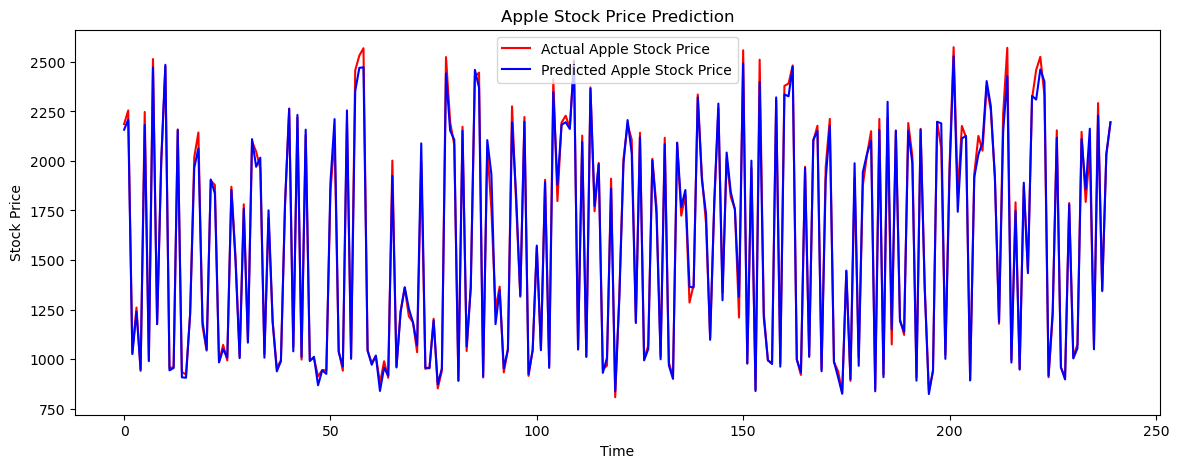

In [46]:
# Plot the predicted vs actual prices
plt.figure(figsize=(14, 5))
plt.plot(actual_stock_price, color='red', label='Actual Apple Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [48]:
# Save the model
model.save('stock_price_predictor.h5')

In [50]:
# Load the trained model
model = load_model('stock_price_predictor.h5')

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

def predict_next_day(stock_data, seq_length=60):
    # Scale the input data
    stock_scaled = scaler.fit_transform(stock_data)

    # Create sequences
    x, _ = create_sequences(stock_scaled, seq_length)

    # Make prediction
    predicted_scaled = model.predict(x[-1].reshape(1, seq_length, 1))

    # Rescale the prediction back to original scale
    predicted_price = scaler.inverse_transform(predicted_scaled)

    return predicted_price[0][0]